In [9]:

import numpy as np
from keras.models import Sequential 
from keras.layers import Dense ,Flatten
from keras.utils import to_categorical              
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from keras.optimizers import Adam


uint8 (50000, 32, 32, 3) uint8 (50000, 1)


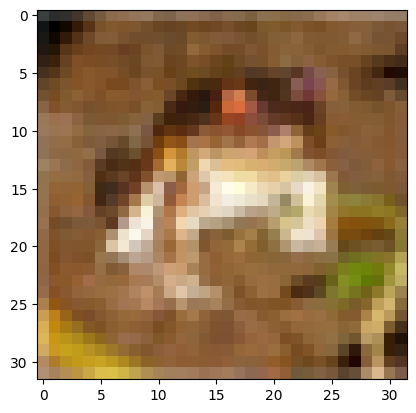

label is [6]


In [33]:

#load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print(X_train.dtype, X_train.shape, y_train.dtype, y_train.shape)

plt.imshow(X_train[0])
plt.show()
print(f"label is {y_train[0]}")

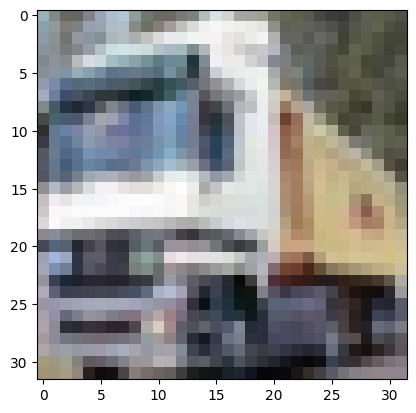

label is [9]


In [ ]:

plt.imshow(X_train[1])
plt.show()
print(f"label is {y_train[1]}")#method broadcasting to normalize data
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

#to categorical conversion
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [35]:
model=Sequential()
model.add(Flatten(input_shape=(32,32,3)))#1st layer
model.add(Dense(128,activation='relu'))#128 neuron 2nd layer
model.add(Dense(10,activation='softmax'))#3rd layer 

C:\Users\Raj\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [36]:
# compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [37]:
#train the model
res=model.fit(X_train, y_train, epochs=10, batch_size=128,validation_split=0.2)
print("Code executed successfully")

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.3028 - loss: 1.9542 - val_accuracy: 0.3557 - val_loss: 1.8329
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.3612 - loss: 1.8014 - val_accuracy: 0.3546 - val_loss: 1.8064
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.3830 - loss: 1.7434 - val_accuracy: 0.3875 - val_loss: 1.7438
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.3946 - loss: 1.7170 - val_accuracy: 0.3941 - val_loss: 1.7190
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4087 - loss: 1.6838 - val_accuracy: 0.3943 - val_loss: 1.7232
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.4169 - loss: 1.6567 - val_accuracy: 0.4089 - val_loss: 1.6922
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4209 - loss: 1.6420 - val_accuracy: 0.4034 - val_loss: 1.6860
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.4250 - loss: 1.6243 - val_accuracy: 0

In [38]:
# validation
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Validation loss: {loss}")
print(f"Validation accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4307 - loss: 1.6040
Validation loss: 1.6040213108062744
Validation accuracy: 0.43070000410079956


In [39]:
print(res.history.keys())
print(res.history.values())
print(res.history)

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
dict_values([[0.302825003862381, 0.3612000048160553, 0.3829750120639801, 0.3946250081062317, 0.4087499976158142, 0.4168500006198883, 0.42092499136924744, 0.4249500036239624, 0.430525004863739, 0.439300000667572], [1.954179286956787, 1.8013927936553955, 1.7434253692626953, 1.717030644416809, 1.6838375329971313, 1.6566933393478394, 1.6419533491134644, 1.6243023872375488, 1.6124463081359863, 1.5944386720657349], [0.35569998621940613, 0.3546000123023987, 0.38749998807907104, 0.39410001039505005, 0.39430001378059387, 0.4088999927043915, 0.4034000039100647, 0.41370001435279846, 0.412200003862381, 0.426800012588501], [1.8329308032989502, 1.806404709815979, 1.7437859773635864, 1.71903395652771, 1.7231603860855103, 1.6922274827957153, 1.6859650611877441, 1.6761107444763184, 1.6701523065567017, 1.626421332359314]])
{'accuracy': [0.302825003862381, 0.3612000048160553, 0.3829750120639801, 0.3946250081062317, 0.4087499976158142, 0.41685000

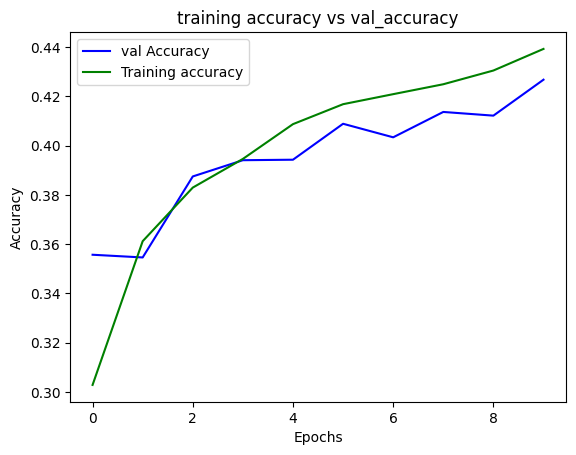

In [40]:
plt.plot(res.history['val_accuracy'], label='val Accuracy',color='blue')
plt.plot(res.history['accuracy'], label='Training accuracy',color='green')
plt.legend()
plt.title('training accuracy vs val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

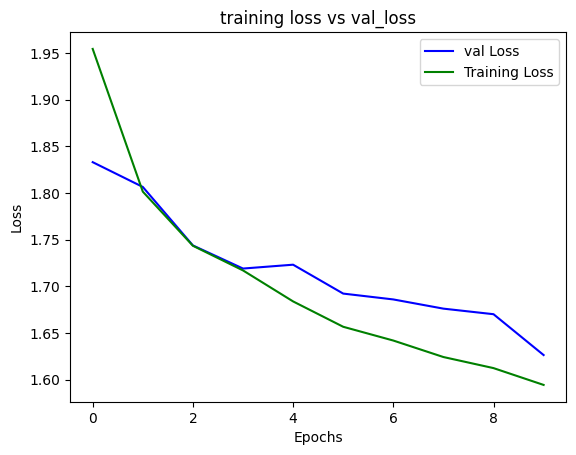

In [41]:
plt.plot(res.history['val_loss'], label='val Loss',color='blue')
plt.plot(res.history['loss'], label='Training Loss',color='green')
plt.legend()
plt.title('training loss vs val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

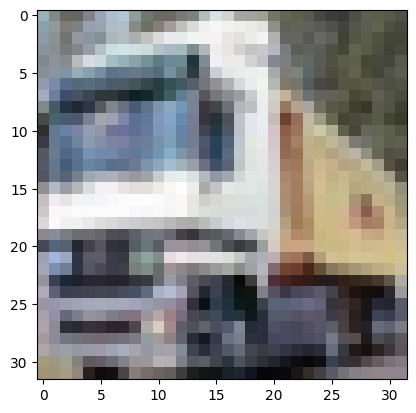

label is [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [42]:

plt.imshow(X_train[1])
plt.show()
print(f"label is {y_train[1]}")#method broadcasting to normalize data
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

#to categorical conversion
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [47]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
model=Sequential()
model.add(Flatten(input_shape=(32,32,3)))#1st layer
model.add(Dense(1024,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))#128 neuron 2nd layer
model.add(Dense(10,activation='softmax'))#3rd layer 
# compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
#train the model
res=model.fit(X_train, y_train, epochs=10, batch_size=128,validation_split=0.2)
print("Code executed successfully")
# validation
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Validation loss: {loss}")
print(f"Validation accuracy: {accuracy}")
print(res.history.keys())
print(res.history.values())
print(res.history)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 66ms/step - accuracy: 0.1968 - loss: 40.1225 - val_accuracy: 0.2596 - val_loss: 2.6910
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 65ms/step - accuracy: 0.3026 - loss: 2.1672 - val_accuracy: 0.3044 - val_loss: 2.1831
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 72ms/step - accuracy: 0.3379 - loss: 1.9469 - val_accuracy: 0.3584 - val_loss: 1.8602
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 69ms/step - accuracy: 0.3643 - loss: 1.8239 - val_accuracy: 0.3272 - val_loss: 1.9554
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 70ms/step - accuracy: 0.3817 - loss: 1.7729 - val_accuracy: 0.3789 - val_loss: 1.7874
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 68ms/step - accuracy: 0.4061 - loss: 1.7014 - val_accuracy: 0.3808 - val_loss: 1.8085
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 71ms/step - accuracy: 0.4153 - loss: 1.6696 - val_accuracy: 0.3881 - val_loss: 1.7339
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 74ms/step - accuracy: 0.4184 - loss: 1.6571 -

In [48]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
model=Sequential()
model.add(Flatten(input_shape=(32,32,3)))#1st layer

model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))#128 neuron 2nd layer
model.add(Dense(10,activation='softmax'))#3rd layer 
# compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
#train the model
res=model.fit(X_train, y_train, epochs=10, batch_size=128,validation_split=0.2)
print("Code executed successfully")
# validation
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Validation loss: {loss}")
print(f"Validation accuracy: {accuracy}")
print(res.history.keys())
print(res.history.values())
print(res.history)

C:\Users\Raj\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.2026 - loss: 39.2571 - val_accuracy: 0.2373 - val_loss: 10.0708
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.2427 - loss: 5.4517 - val_accuracy: 0.2499 - val_loss: 3.6030
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.2537 - loss: 3.2671 - val_accuracy: 0.2552 - val_loss: 2.7543
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.2963 - loss: 2.2508 - val_accuracy: 0.2675 - val_loss: 2.3326
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.3189 - loss: 2.0425 - val_accuracy: 0.3279 - val_loss: 1.9518
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.3256 - loss: 1.9706 - val_accuracy: 0.3110 - val_loss: 2.0160
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.3453 - loss: 1.8638 - val_accuracy: 0.3157 - val_loss: 2.0273
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.3558 - loss: 1.8401 - val_ac